In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# County health rankings

In [3]:
#Data from https://www.walkscore.com/cities-and-neighborhoods
health = pd.read_excel('Data/2017CountyHealthRankingsData.xls',
              sheetname='Ranked Measure Data',
              skiprows=[0])

In [4]:
health.head()

,FIPS,State,County,# Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,% Fair/Poor,95% CI - Low.1,...,95% CI - High.20,Quartile.33,% Drive Alone - Black,% Drive Alone - Hispanic,% Drive Alone - White,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Quartile.34
0,1001,Alabama,Autauga,830.0,9158.2,8251.0,10065.3,1,17.878814,17.309716,...,89.272604,4,NaN,NaN,82.688642,21101,42.6,38.498437,46.701563,3
1,1003,Alabama,Baldwin,2573.0,7393.9,6947.3,7840.4,1,16.361973,15.930774,...,85.889448,2,84.812778,61.239620,85.255443,71535,37.7,35.278607,40.121393,3
2,1005,Alabama,Barbour,413.0,8573.1,7291.9,9854.3,1,25.020401,24.388756,...,85.631456,2,82.056719,NaN,NaN,7090,35.5,30.606183,40.393817,3
3,1007,Alabama,Bibb,407.0,11766.1,10033.8,13498.4,4,19.540231,18.909030,...,88.544332,2,NaN,NaN,88.356941,6778,46.5,39.207540,53.792460,4
4,1009,Alabama,Blount,906.0,9332.8,8429.8,10235.8,2,18.947608,18.348409,...,87.475791,2,NaN,73.117034,82.172461,18624,59.8,55.074426,64.525574,4


In [5]:
health.shape

(3136, 156)

In [135]:
health_sm = health[
    ['Mentally Unhealthy Days', 
     '% Long Commute - Drives Alone', 
     '% Unemployed',
     'Income Ratio',
     'Population',
     'County',
     'State'
    ]
]
health_sm['Population'] = np.log(health_sm['Population'])
health_sm.columns = ['unhealthy', 'commute', 'unemployed', 'inequality', 'logpop', 'County', 'State']

/home/hudson/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


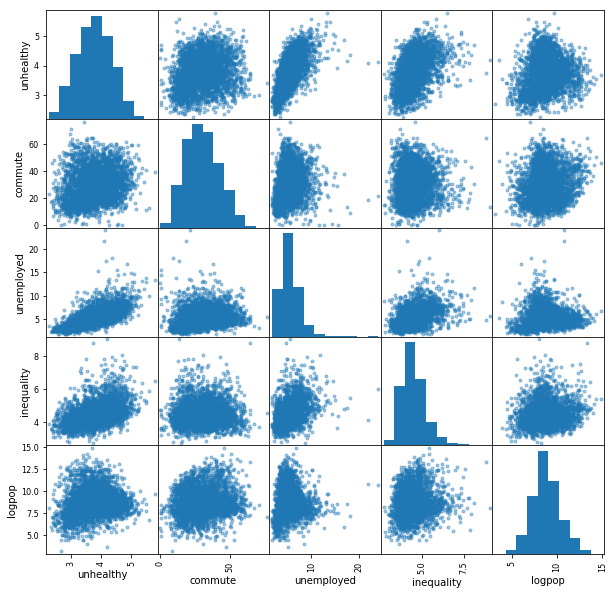

In [12]:
sc = pd.scatter_matrix(health_sm, alpha=.4, figsize=(10, 10))

In [13]:
import patsy
import statsmodels.api as sm

In [14]:
outcome, predictors = patsy.dmatrices('unhealthy ~ \
                                      commute + \
                                      unemployed + \
                                      inequality + \
                                      logpop',
                                          health_sm)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              unhealthy   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     758.6
Date:                Tue, 30 May 2017   Prob (F-statistic):               0.00
Time:                        21:08:33   Log-Likelihood:                -1624.7
No. Observations:                3134   AIC:                             3259.
Df Residuals:                    3129   BIC:                             3290.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.7442      0.061     28.797      0.0

# Walk Score (Must run HTML section of Walk Score notebook to prepare data)

In [93]:
ws = pd.DataFrame.from_csv('Data/MostWalkable.csv').replace('--', np.nan)
ws[ws.columns[2:5]] = ws[ws.columns[2:5]].applymap(float)

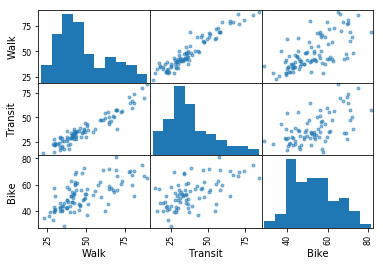

In [94]:
sc = pd.scatter_matrix(ws)

## Do the Walk Score locations match with locations in our health database?

In [122]:
abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

In [138]:
health['State'] = [abbrev[state] for state in health['State']]
health_sm['State'] = [abbrev[state] for state in health_sm['State']]

In [139]:
pd.merge(health[['State', 'County']], ws[['State', 'City']],
        left_on=['County','State'], right_on=['City','State'])

,State,County,City
0,AL,Montgomery,Montgomery
1,AK,Anchorage,Anchorage
2,CA,Fresno,Fresno
3,CA,Los Angeles,Los Angeles
4,CA,Riverside,Riverside
5,CA,Sacramento,Sacramento
6,CA,San Bernardino,San Bernardino
7,CA,San Diego,San Diego
8,CA,San Francisco,San Francisco
9,CO,Denver,Denver


# ACCRA

In [49]:
#Data from https://www.walkscore.com/cities-and-neighborhoods
accra = pd.read_excel('Data/2010-annual.xls',
              sheetname='Section1Index',
              skiprows=[0,1,2,4],
              columns = ['CITY CODE', 'URBAN AND STATE', 'METRO/MICRO', 'URBAN AREA AND STATE', 'COMPOSITE',
       'GROCERY', 'HOUSING', 'UTILITIES', 'TRANSPORTATION', 'HEALTH',
       'MISC'])

In [77]:
accra.head()

,CITY CODE,STATE,METRO/MICRO,URBAN AREA AND STATE,INDEX,ITEMS,HOUSING,UTILITIES,PORTATION,HEALTH CARE,AND SERVICES
0,111500100,Alabama,Anniston-Oxford AL Metro,Anniston-Calhoun County AL,91.186488,101.137590,74.642565,111.428208,88.859581,89.114706,96.521071
1,112220125,Alabama,Auburn-Opelika AL Metro,Auburn-Opelika AL,98.843436,104.595980,90.088268,101.572797,92.878231,88.235635,106.559875
2,113820200,Alabama,Birmingham-Hoover AL Metro,Birmingham AL,90.757193,93.505373,72.963614,105.944606,93.500119,87.764596,100.259996
3,119460235,Alabama,Decatur AL Metro,Decatur-Hartselle AL,89.165416,98.519279,74.012990,90.826057,96.695267,85.369448,96.530336
4,120020250,Alabama,Dothan AL Metro,Dothan AL,89.770820,100.278446,79.840387,79.859843,91.771518,81.547155,97.839582


## Do the ACCRA locations match with locations in our health or walk score databases?

In [152]:
accra['STATE'] = [abbrev[state] for state in accra['STATE']]

In [153]:
accra.head()

,CITY CODE,STATE,METRO/MICRO,URBAN AREA AND STATE,INDEX,ITEMS,HOUSING,UTILITIES,PORTATION,HEALTH CARE,AND SERVICES
0,111500100,AL,Anniston-Oxford AL Metro,Anniston-Calhoun County AL,91.186488,101.137590,74.642565,111.428208,88.859581,89.114706,96.521071
1,112220125,AL,Auburn-Opelika AL Metro,Auburn-Opelika AL,98.843436,104.595980,90.088268,101.572797,92.878231,88.235635,106.559875
2,113820200,AL,Birmingham-Hoover AL Metro,Birmingham AL,90.757193,93.505373,72.963614,105.944606,93.500119,87.764596,100.259996
3,119460235,AL,Decatur AL Metro,Decatur-Hartselle AL,89.165416,98.519279,74.012990,90.826057,96.695267,85.369448,96.530336
4,120020250,AL,Dothan AL Metro,Dothan AL,89.770820,100.278446,79.840387,79.859843,91.771518,81.547155,97.839582


In [53]:
import difflib

In [172]:
for state in health['State']:
    for city in health.loc[health['State'] == state, 'County']:
        matches = difflib.get_close_matches(city, accra.loc[accra['STATE'] == state, 'URBAN AREA AND STATE'])
        if len(matches) > 0: print(state, city, matches)
        #np.array(matches)[[city in match for match in matches]]

AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['Montgomery AL']
AL Tallapoosa ['Tuscaloosa AL']
AL Tuscaloosa ['Tuscaloosa AL']
AL Mobile ['Mobile AL']
AL Montgomery ['

KeyboardInterrupt: 

In [69]:
for city in ws['City']:
    match = difflib.get_close_matches(city, accra['URBAN AREA AND STATE'])
    print(city, match)

New York []
Los Angeles ['Los Angeles-Long Beach CA']
Chicago ['Chicago IL']
Houston ['Houston TX', 'Boston MA']
Philadelphia ['Philadelphia PA']
Phoenix ['Phoenix AZ']
San Antonio ['San Antonio TX']
San Diego ['San Diego CA']
Dallas ['Dallas TX']
San Jose ['San Jose CA']
Jacksonville ['Jacksonville NC', 'Jacksonville FL', 'Janesville WI']
Indianapolis ['Minneapolis MN']
San Francisco ['San Francisco CA']
Austin ['Austin TX']
Columbus ['Columbus OH', 'Columbia SC', 'Columbia MO']
Fort Worth ['Fort Worth TX', 'Fort Smith AR']
Charlotte ['Charlotte NC', 'Charlottesville VA']
Detroit ['Detroit MI']
El Paso ['El Paso TX']
Memphis ['Memphis TN']
Baltimore ['Baltimore MD']
Boston ['Boston MA', 'Houston TX']
Seattle ['Seattle WA']
Washington D.C. ['Wilmington NC', 'Wilmington DE']
Nashville-Davidson ['Nashville-Franklin TN']
Denver ['Denver CO']
Louisville-Jefferson ['Louisville KY']
Milwaukee ['Milwaukee-Waukesha WI']
Portland ['Portland OR', 'Portland ME']
Las Vegas ['Las Vegas NV']
Oklahom

# Merge

In [146]:
merged = pd.merge(health_sm, ws[ws.columns[:-1]],
        left_on=['County','State'], right_on=['City','State'])

In [148]:
merged

,unhealthy,commute,unemployed,inequality,logpop,County,State,City,Walk,Transit,Bike
0,4.464722,17.9,6.164377,5.476467,11.027735,Montgomery,AL,Montgomery,26.9,NaN,NaN
1,3.270556,14.7,5.002655,3.762653,11.390396,Anchorage,AK,Anchorage,32.0,22.3,NaN
2,4.035413,22.1,10.190288,5.092603,12.456209,Fresno,CA,Fresno,46.3,30.3,55.9
3,3.695493,46.1,6.721462,5.417518,14.900985,Los Angeles,CA,Los Angeles,67.4,51.3,56.0
4,3.908424,44.9,6.727828,4.592636,13.311899,Riverside,CA,Riverside,41.3,31.2,49.9
5,3.885126,35.1,6.005089,4.897537,12.927489,Sacramento,CA,Sacramento,47.1,33.8,68.9
6,4.011479,40.1,6.458596,4.727690,13.259049,San Bernardino,CA,San Bernardino,42.0,37.6,39.3
7,3.411059,32.9,5.199266,4.877107,13.752754,San Diego,CA,San Diego,50.9,36.7,45.5
8,3.301143,47.7,3.636835,7.103263,12.687965,San Francisco,CA,San Francisco,86.0,80.4,75.1
9,3.576781,34.4,3.703475,5.224537,12.396292,Denver,CO,Denver,60.5,46.9,71.3


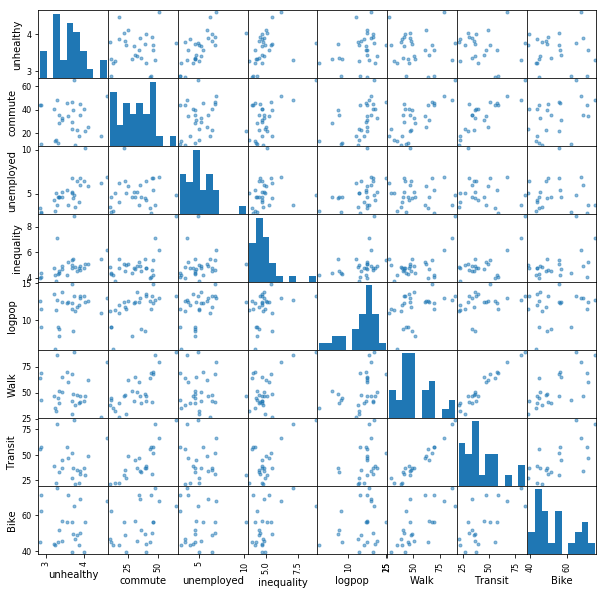

In [149]:
sc = pd.scatter_matrix(merged, figsize = (10,10))

In [151]:
outcome, predictors = patsy.dmatrices('unhealthy ~ \
                                      commute + \
                                      unemployed + \
                                      inequality + \
                                      logpop + \
                                      Walk + \
                                      Transit + \
                                      Bike' ,
                                          merged)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              unhealthy   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     3.028
Date:                Tue, 30 May 2017   Prob (F-statistic):             0.0403
Time:                        22:20:51   Log-Likelihood:                0.17795
No. Observations:                  21   AIC:                             15.64
Df Residuals:                      13   BIC:                             24.00
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2194      0.725      3.061      0.0